In [108]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [110]:
digits = load_digits()

In [112]:
X=digits['data']

In [114]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

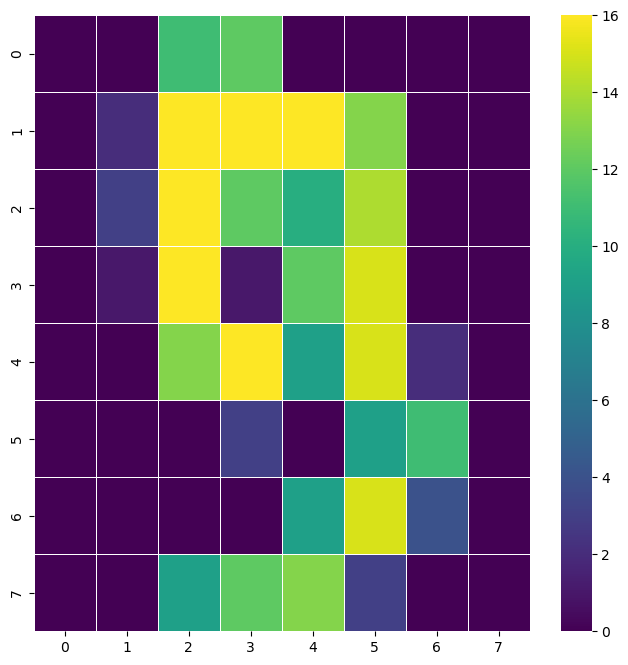

In [116]:
plt.figure(figsize=(8, 8))
sns.heatmap(np.reshape(X[9],(8,8)), annot=False, cmap='viridis', fmt='.2f', linewidths=.5)
plt.show()

In [117]:
X.shape

(1797, 64)

In [118]:
y=digits['target']

In [122]:
y.shape

(1797,)

In [124]:
y_one_hot=np.array([[0,0,0,0,0,0,0,0,0,0] for i in range(1) for j in range(y.shape[0])])
for i in range(len(y)):    
        y_one_hot[i][y[i]]=1

In [126]:
X_train, X_test, y_label_train, y_label_test = train_test_split(X, y, test_size=0.2,random_state=42)
y_one_hot_label_train, y_one_hot_label_test= train_test_split(y_one_hot, test_size=0.2,random_state=42)

In [128]:
X_train.shape

(1437, 64)

In [130]:
X_test.shape

(360, 64)

In [132]:
y_one_hot_label_train.shape

(1437, 10)

In [134]:
y_one_hot_label_test.shape

(360, 10)

In [136]:
shape = (10, 64)
W = np.random.rand(*shape)

In [138]:
W.shape

(10, 64)

In [140]:
def sigmoid(array):
    return 1/(1+np.exp(-array))

In [146]:
def binary_crossentropy(y_true, y_pred):
    """
    Compute binary cross-entropy loss.

    Parameters:
    y_true (array-like): Ground truth labels (0 or 1).
    y_pred (array-like): Predicted probabilities (between 0 and 1).

    Returns:
    float: Binary cross-entropy loss.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Clip predictions to prevent log(0)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    
    # Calculate binary cross-entropy
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss


In [148]:
def model_forward(x):
    x=np.reshape(x,(64,1))
    z=W@x
    y_hat=sigmoid(z)
    return y_hat,z

In [150]:
def model_backward(x,y,y_hat,z):
    x=np.reshape(x,(64,1))
    
    dloss_dy_hat=((y_hat-np.reshape(y,(10,1)))/(y_hat*(1-y_hat)+0.0000000001)).T
    dy_hat_dz=np.eye(10)*(np.exp(-z)/((1+np.exp(-z))**2))

    delta=dloss_dy_hat@dy_hat_dz

    dloss_dW=delta.T@np.reshape(x,(64,1)).T
    return dloss_dW

In [152]:
alpha=0.001
num_epochs=100
epoch=0
while epoch<num_epochs:
    for i in range(len(X_train)):
        y_hat,z=model_forward(X_train[i])
        gradW=model_backward(X_train[i],y_one_hot_label_train[i],y_hat,z)
        W=W-alpha*gradW
    epoch+=1

In [153]:
y_hat,z=model_forward(X_test[0])

In [52]:
y_hat

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])